#     Plot latitude profile comparisons of aircraft and model data, and compare both with binned data


## Setup imports

In [1]:
import matplotlib.pyplot as plt

import notebook_prepare as pre

## Define plotting function

In [2]:
def plot_latitude_profile(full_df,df,plotdir,key,label,a_colour,m_colour,lat_bin,avg_method,min_method,max_method,model) :

    """
    Plot latitude profile comparisons of aircraft and model data.
    """

    # Define the figure.
    fig,ax = pre.setup_figure()

    # Define the data.
    lat_data = df['Latitude']
    data = pre.read_data_values(df, model)

    # Plot the data.
    plt.scatter(lat_data,data['a_avg'],s=200,c=a_colour,label='Aircraft')
    
    if(model):
        plt.scatter(lat_data,data['m_avg'],s=200,c=m_colour,label='Model')

    # Set the axes labels.
    plt.xlabel('Latitude / degrees north',fontsize=50,labelpad=10)
    plt.ylabel(label,fontsize=50,labelpad=10)

    # Set the axes ticks.
    ax.tick_params(labelsize=30)

    # Add a legend.
    plt.legend(fontsize=30,markerscale=2)

    plt.show()
    # Save the figure.
    #plt.savefig(plotdir+key+'_Latitude_Profile.png')
    #plt.close()

    """
    Plot latitude profile comparisons of aircraft and model data with binned data.
    """

    # Define the figure.
    fig,ax = pre.setup_figure()

    # Define the data.
    data = pre.bin_latitude_data(full_df,avg_method,min_method,max_method,lat_bin, model)

    # Plot the data.
    plt.plot(data['binned'],data['a_avg'],lw=5,c=a_colour,label='Aircraft')
    plt.fill_between(data['binned'],data['a_min'],data['a_max'],fc=a_colour,ec=None,alpha=0.5)
    
    if(model):
        plt.plot(data['binned'],data['m_avg'],lw=5,c=m_colour,label='Model')
        plt.fill_between(data['binned'],data['m_min'],data['m_max'],fc=m_colour,ec=None,alpha=0.5)

    # Set the axes labels.
    plt.xlabel('Latitude / degrees north',fontsize=50,labelpad=10)
    plt.ylabel(label,fontsize=50,labelpad=10)

    # Set the axes ticks.
    ax.tick_params(labelsize=30)

    # Add a legend.
    plt.legend(fontsize=30,markerscale=2)

    plt.show()
    # Save the figure.
    #plt.savefig(plotdir+key+'_Latitude_Profile_Binned.png')
    #plt.close()

## Specify the flight number & model data

In [3]:
# Set the flight number.
# Current valid options are M270, M296 and M302.
flight_number = 'M270'  

# Specify whether you have model data to plot.
model = False

## Prepare the data and plot for each pollution species

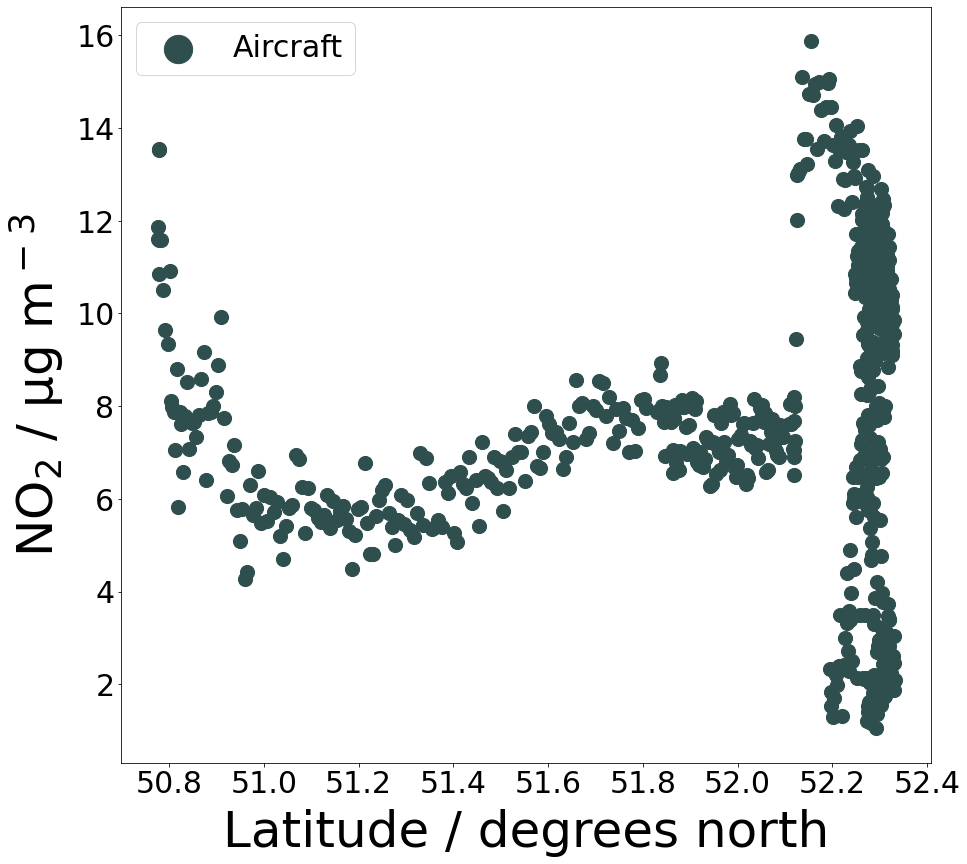

{'binned': [50.75, 50.85000000000001, 50.95, 51.05000000000001, 51.150000000000006, 51.250000000000014, 51.35000000000001, 51.45000000000002, 51.55000000000001, 51.65000000000002, 51.750000000000014, 51.85000000000002, 51.95000000000002, 52.050000000000026, 52.15000000000002, 52.25000000000003, 52.35000000000002], 'a_avg': [11.302857269725767, 7.841086653146835, 6.38091151597419, 5.836262320287545, 5.585656806674123, 5.63547571129104, 5.908681092784983, 6.275819250694277, 6.993873216195428, 7.520511640667746, 7.783837185012273, 7.620937124310183, 7.170053115425962, 7.288305140782059, 10.814433694464784, 8.748297081113737, 8.269125301487682], 'a_min': [6.02741700854526, 2.9107601134471057, 1.3079920649892227, 2.124620880181336, 0.8792063983778569, 1.8403051363359024, 1.4701362289033924, 2.4373111324087584, 2.8501033942712577, 3.448016402761244, 4.349850664559363, 4.64129009071589, 3.904965258489297, 2.7891985210688595, -0.0498830142845969, -0.3126452949874767, -0.1653411257503016], 'a_m

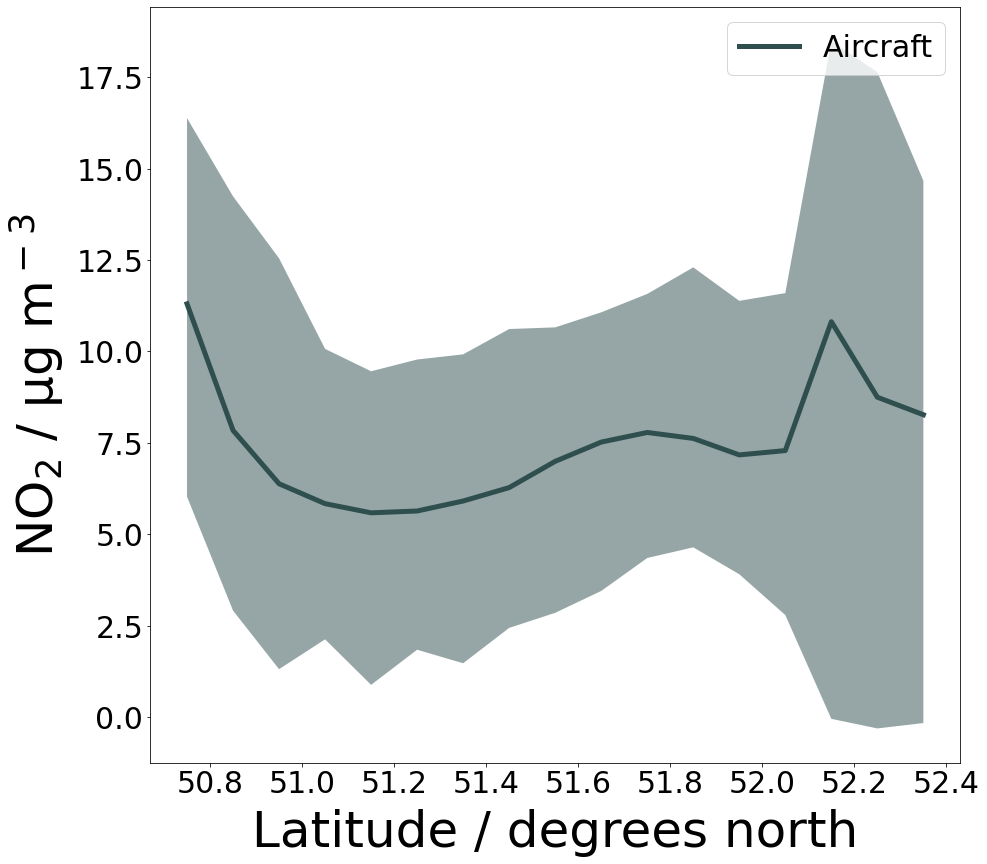

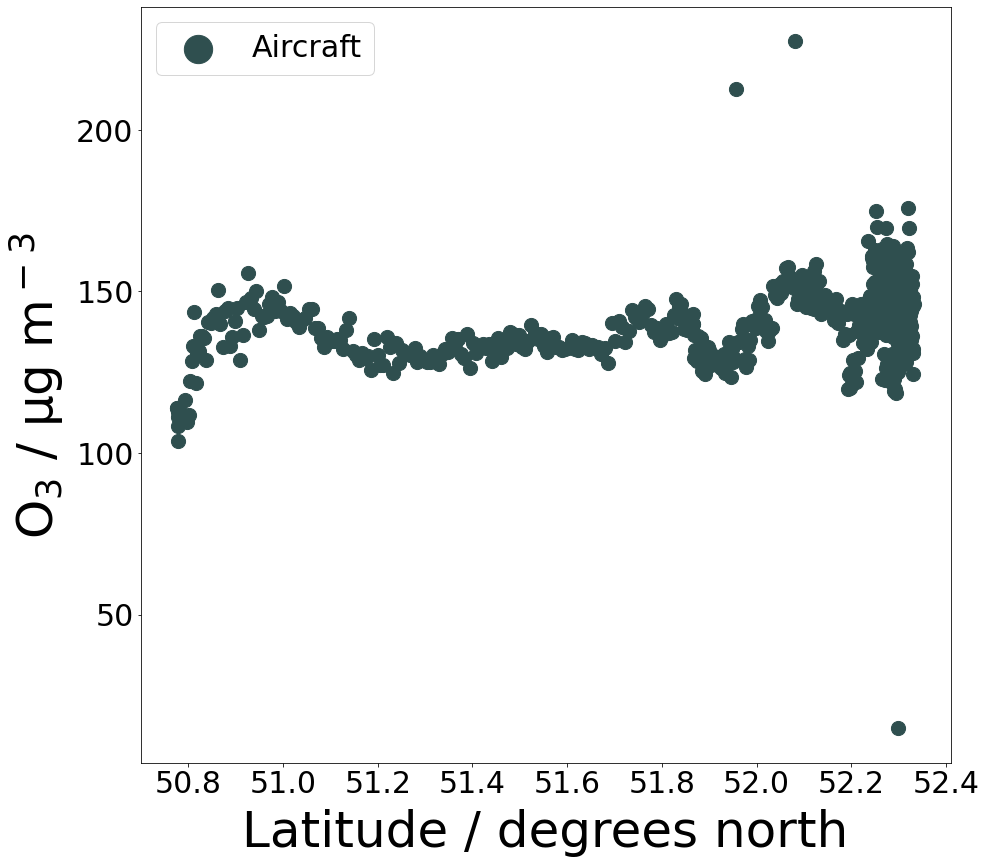

{'binned': [50.75, 50.85000000000001, 50.95, 51.05000000000001, 51.150000000000006, 51.250000000000014, 51.35000000000001, 51.45000000000002, 51.55000000000001, 51.65000000000002, 51.750000000000014, 51.85000000000002, 51.95000000000002, 52.050000000000026, 52.15000000000002, 52.25000000000003, 52.35000000000002], 'a_avg': [111.384784, 135.39815254237288, 144.14561379310348, 140.66022105263158, 132.77602105263156, 130.0489698630137, 130.96123684210525, 133.44283589743588, 134.25821818181817, 133.11609142857142, 139.98795616438355, 137.39770778443116, 132.9311658536585, 150.2812912280702, 143.9615, 147.0711688658265, 144.59293601895735], 'a_min': [98.802, 109.3808, 119.1612, 127.3448, 120.3588, 122.1552, 121.5564, 123.9516, 124.75, 124.3508, 131.5364, 118.762, 119.9596, 87.0256, 115.5684, 14.7704, 86.6264], 'a_max': [121.3568, 155.28879999999998, 158.4824, 158.8816, 144.3108, 141.5164, 142.714, 143.31279999999998, 142.11520000000002, 143.5124, 151.09720000000002, 152.4944, 379.6392, 409

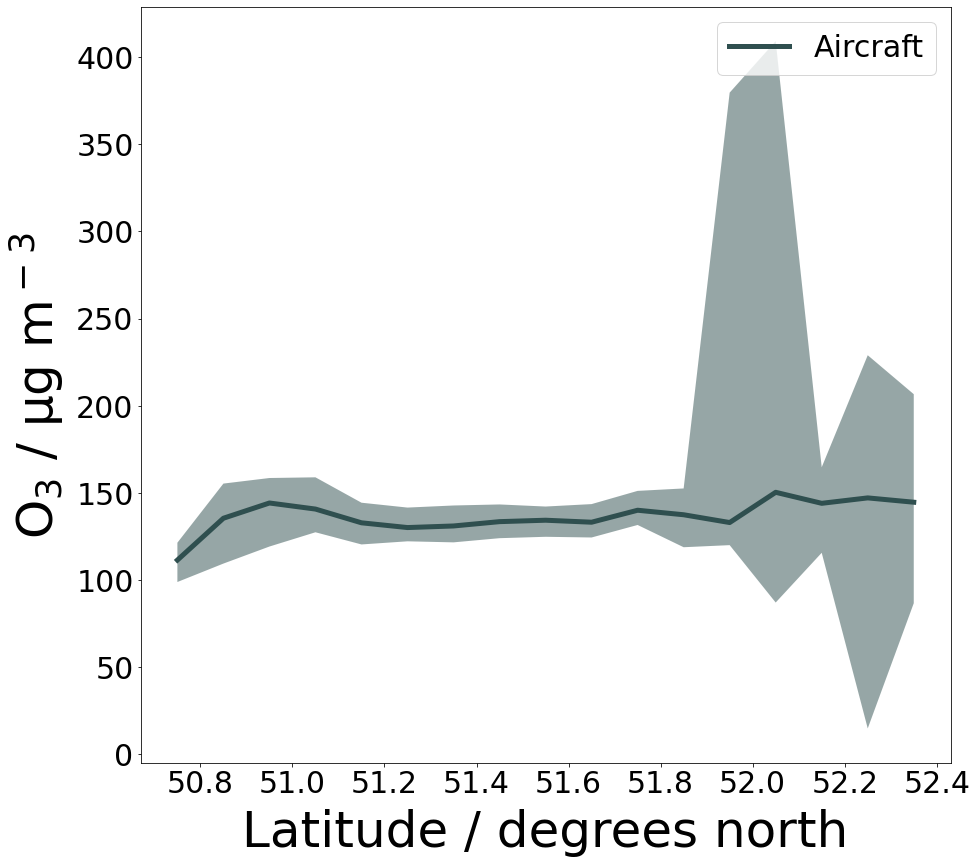

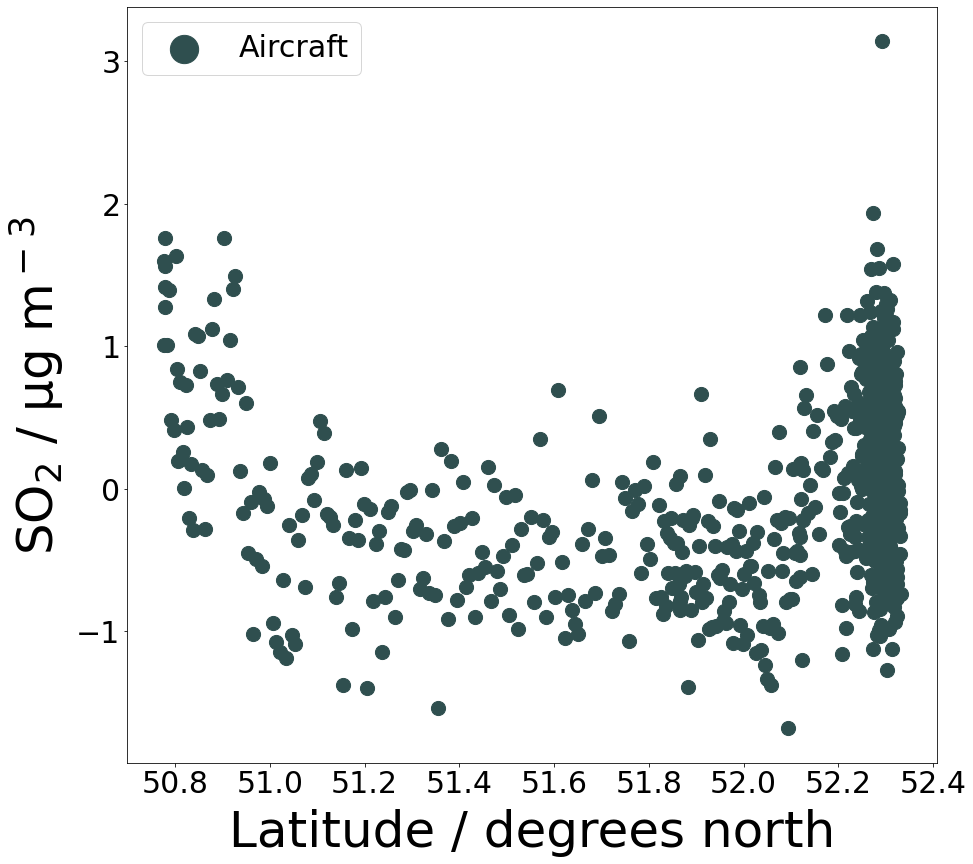

{'binned': [50.75, 50.85000000000001, 50.95, 51.05000000000001, 51.150000000000006, 51.250000000000014, 51.35000000000001, 51.45000000000002, 51.55000000000001, 51.65000000000002, 51.750000000000014, 51.85000000000002, 51.95000000000002, 52.050000000000026, 52.15000000000002, 52.25000000000003, 52.35000000000002], 'a_avg': [1.1604916666666665, 0.5098902658227848, 0.3063514482758621, -0.5273994121621622, -0.29987695999999997, -0.49265263815789473, -0.4234999726027397, -0.4355110469798658, -0.44227963087248323, -0.4828414511278195, -0.41567927737226273, -0.5100520426829268, -0.5354699435736677, -0.6529747987616099, 0.038515330275229374, 0.22598862007028508, 0.09772118116805721], 'a_min': [-1.35711, -2.34168, -2.599797, -2.50134, -2.464086, -2.661, -2.658339, -2.557221, -2.618424, -2.650356, -2.586492, -2.618424, -2.5785090000000004, -2.639712, -2.637051, -2.658339, -2.647695], 'a_max': [4.672716, 5.875488000000001, 5.303373000000001, 2.597136, 2.038326, 2.956371, 3.1479630000000003, 3.11

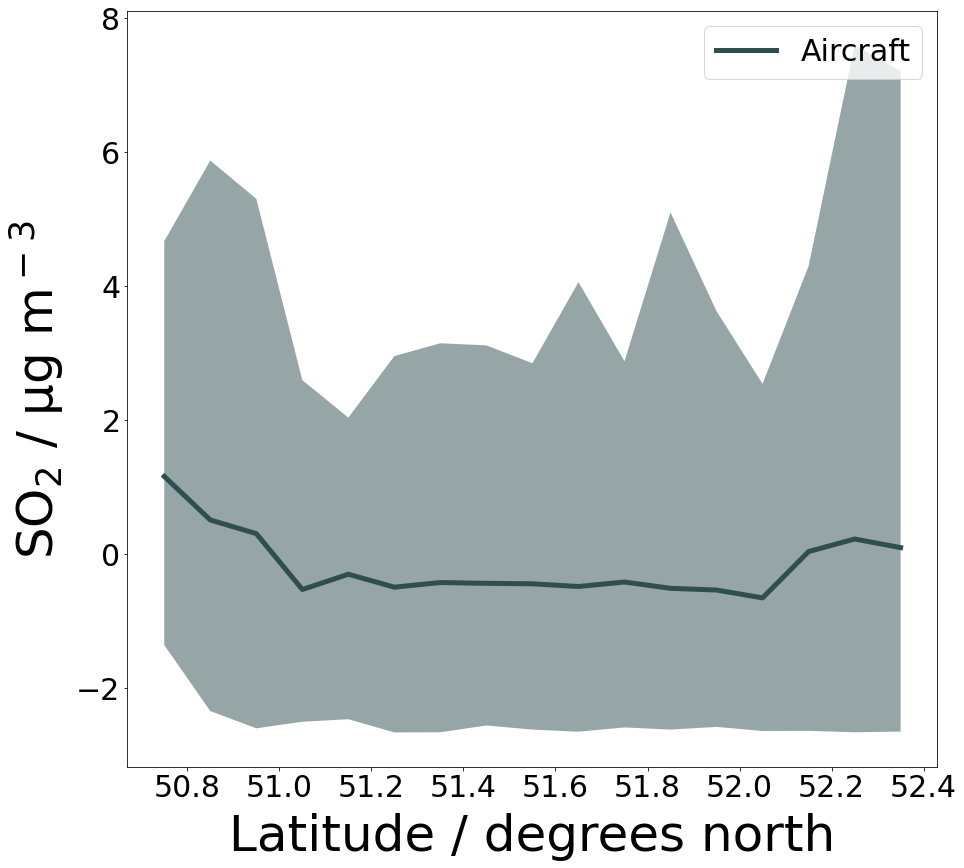

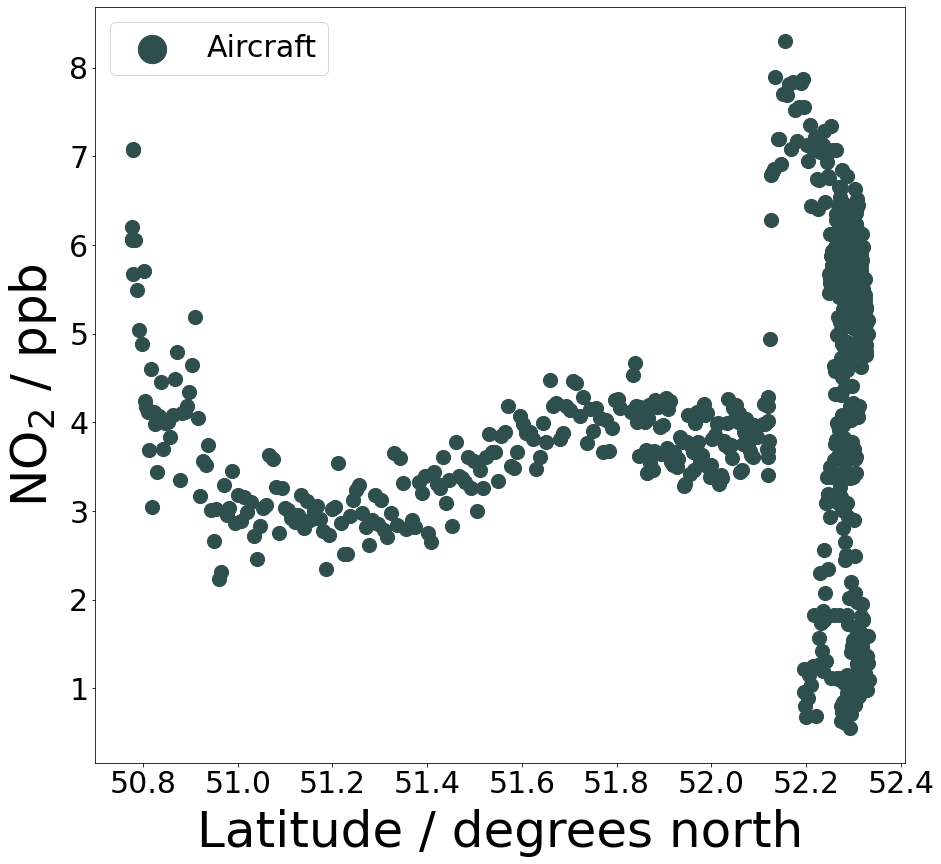

{'binned': [50.75, 50.85000000000001, 50.95, 51.05000000000001, 51.150000000000006, 51.250000000000014, 51.35000000000001, 51.45000000000002, 51.55000000000001, 51.65000000000002, 51.750000000000014, 51.85000000000002, 51.95000000000002, 52.050000000000026, 52.15000000000002, 52.25000000000003, 52.35000000000002], 'a_avg': [5.908446037493866, 4.098842996940321, 3.335552282265651, 3.0508428229417377, 2.9198415089775867, 2.9458838009885207, 3.0886989507501217, 3.2806164405092932, 3.655971362360391, 3.9312658863919214, 4.068916458448652, 3.9837622186671107, 3.748067493688429, 3.8098824572828334, 5.653127911377305, 4.573077407795994, 4.322595557494868], 'a_min': [3.150766862804632, 1.5215682767627317, 0.68373866439583, 1.1106225196975097, 0.4595956081431557, 0.9619995485289612, 0.7684977673305762, 1.2740779573490637, 1.4898606347471288, 1.80241317447007, 2.273837252775412, 2.4261840516026605, 2.0412782323519587, 1.4580232729058336, -0.0260758046443266, -0.163431936742016, -0.08643028005765

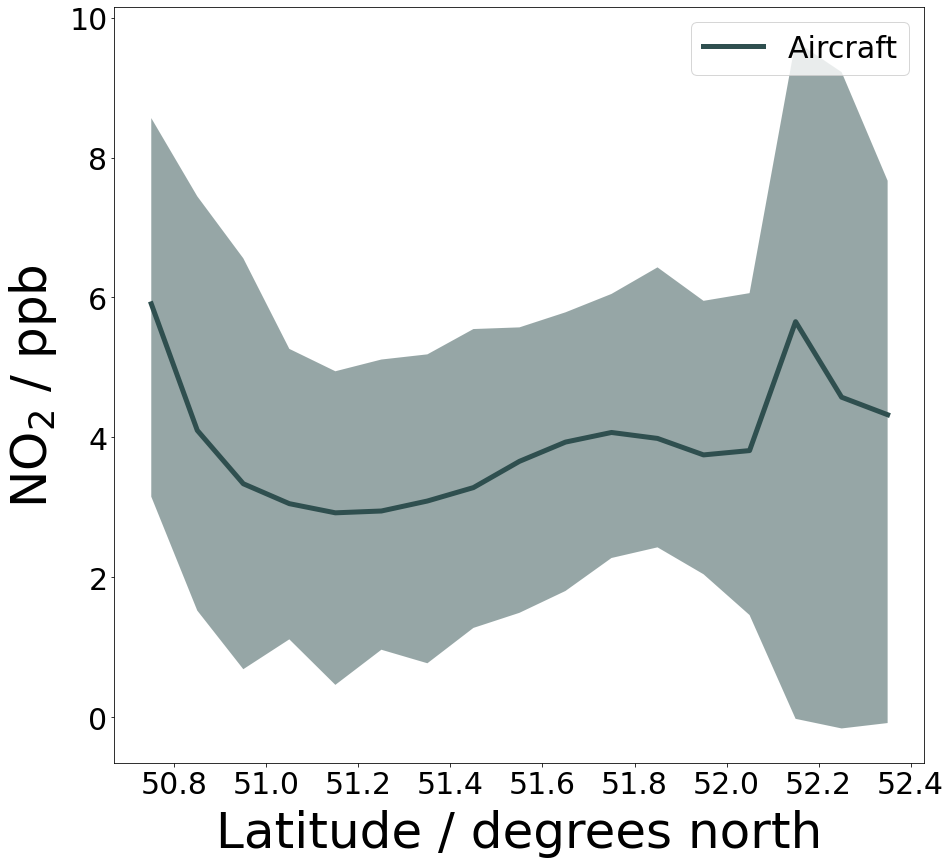

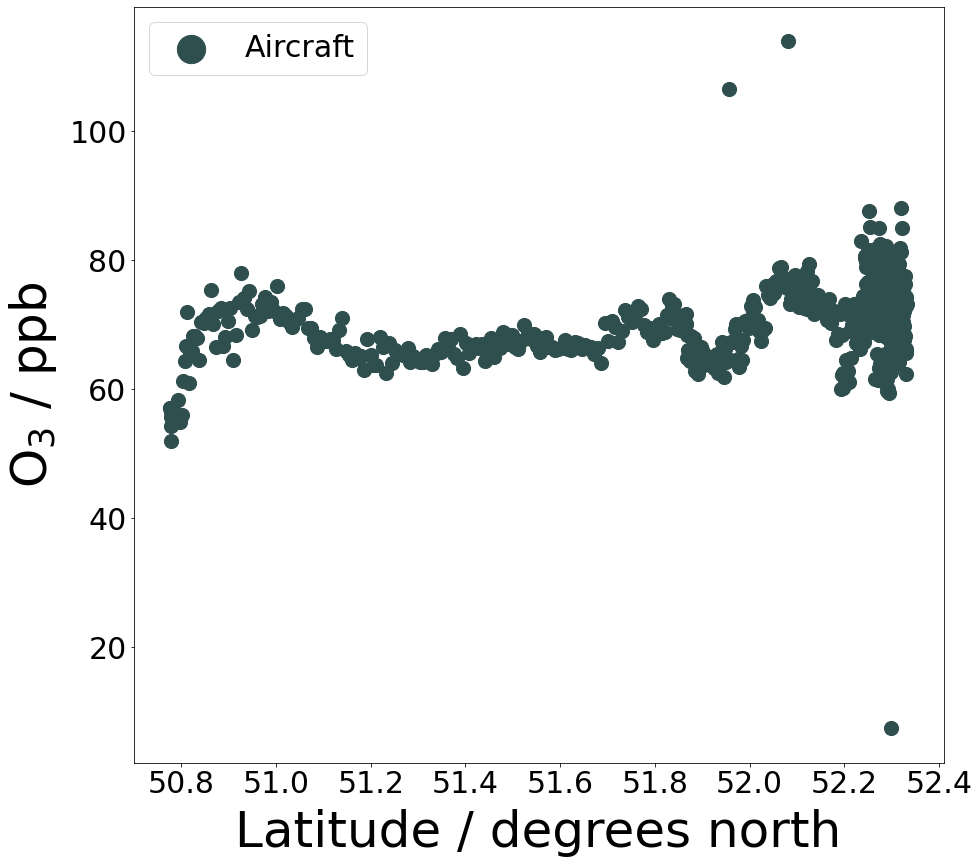

{'binned': [50.75, 50.85000000000001, 50.95, 51.05000000000001, 51.150000000000006, 51.250000000000014, 51.35000000000001, 51.45000000000002, 51.55000000000001, 51.65000000000002, 51.750000000000014, 51.85000000000002, 51.95000000000002, 52.050000000000026, 52.15000000000002, 52.25000000000003, 52.35000000000002], 'a_avg': [55.804, 67.83474576271186, 72.21724137931035, 70.47105263157896, 66.52105263157894, 65.15479452054795, 65.61184210526316, 66.8551282051282, 67.26363636363637, 66.69142857142856, 70.13424657534247, 68.83652694610777, 66.59878048780489, 75.29122807017545, 72.125, 73.68295033358042, 72.44135071090048], 'a_min': [49.5, 54.8, 59.7, 63.8, 60.3, 61.2, 60.9, 62.1, 62.5, 62.3, 65.9, 59.5, 60.1, 43.6, 57.9, 7.4, 43.4], 'a_max': [60.8, 77.8, 79.4, 79.6, 72.3, 70.9, 71.5, 71.8, 71.2, 71.9, 75.7, 76.4, 190.2, 205.0, 82.5, 114.7, 103.5]}


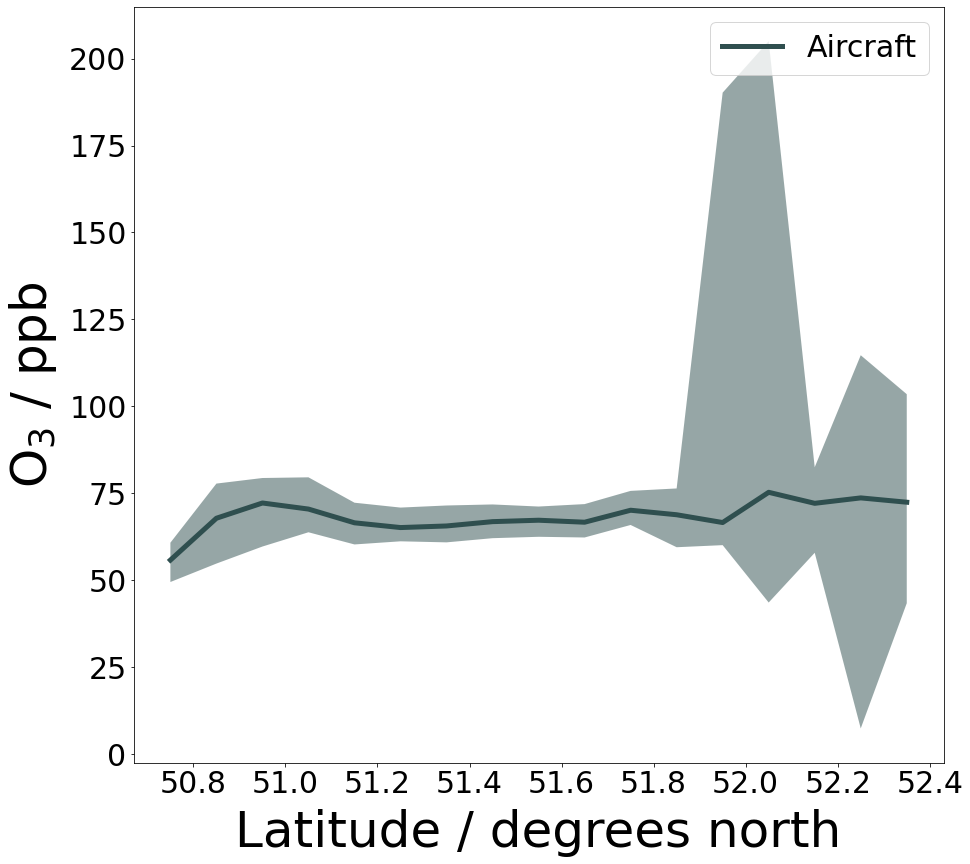

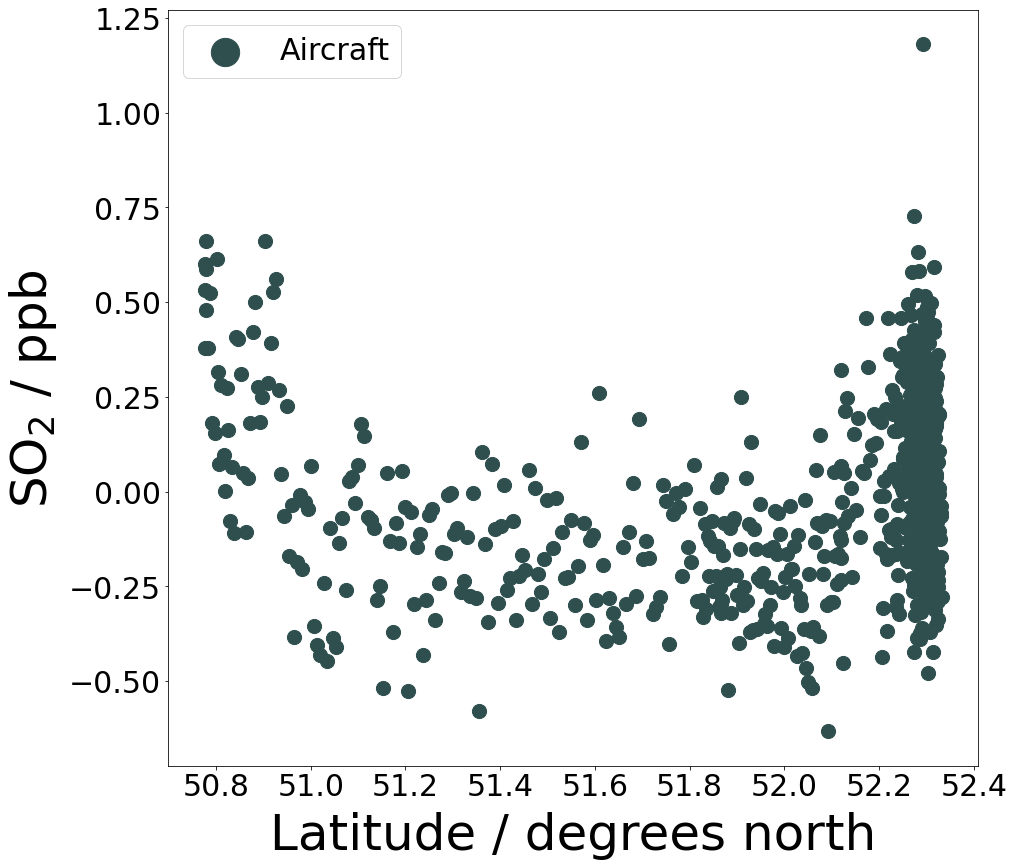

{'binned': [50.75, 50.85000000000001, 50.95, 51.05000000000001, 51.150000000000006, 51.250000000000014, 51.35000000000001, 51.45000000000002, 51.55000000000001, 51.65000000000002, 51.750000000000014, 51.85000000000002, 51.95000000000002, 52.050000000000026, 52.15000000000002, 52.25000000000003, 52.35000000000002], 'a_avg': [0.43611111111111106, 0.19161603375527425, 0.11512643678160919, -0.19819594594594594, -0.11269333333333335, -0.18513815789473687, -0.15915068493150683, -0.16366442953020133, -0.16620805369127517, -0.18145112781954886, -0.15621167883211676, -0.1916768292682927, -0.20122884012539183, -0.24538699690402474, 0.014474006116207963, 0.08492620070285044, 0.03672348033373063], 'a_min': [-0.51, -0.88, -0.977, -0.94, -0.926, -1.0, -0.999, -0.961, -0.984, -0.996, -0.972, -0.984, -0.969, -0.992, -0.991, -0.999, -0.995], 'a_max': [1.756, 2.208, 1.993, 0.976, 0.7659999999999999, 1.111, 1.183, 1.171, 1.071, 1.526, 1.082, 1.917, 1.3630000000000002, 0.955, 1.616, 2.855, 2.71]}


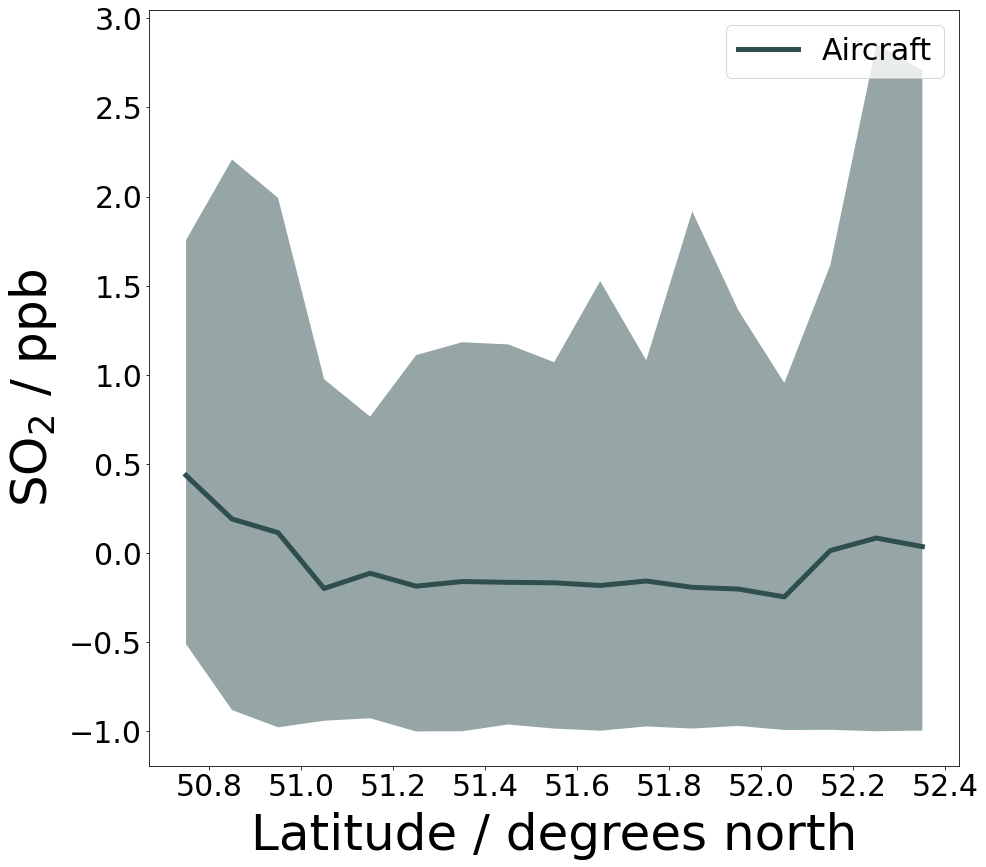

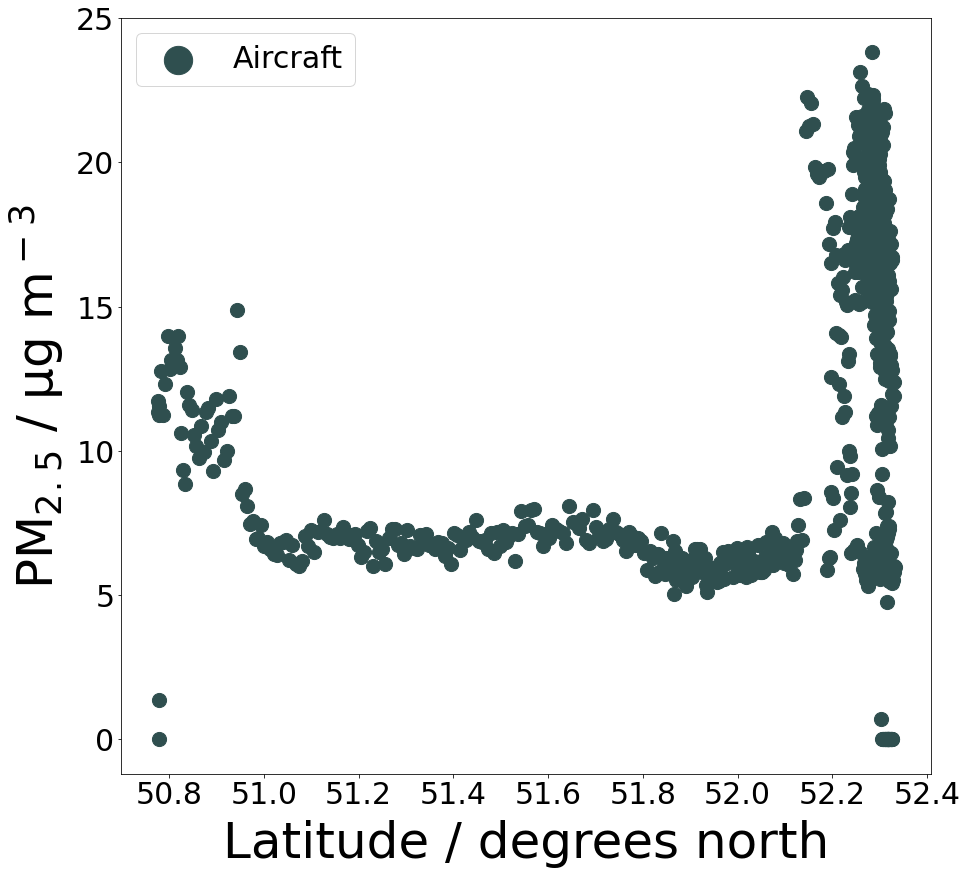

{'binned': [50.75, 50.85000000000001, 50.95, 51.05000000000001, 51.150000000000006, 51.250000000000014, 51.35000000000001, 51.45000000000002, 51.55000000000001, 51.65000000000002, 51.750000000000014, 51.85000000000002, 51.95000000000002, 52.050000000000026, 52.15000000000002, 52.25000000000003, 52.35000000000002], 'a_avg': [10.10905393746423, 11.440116172744897, 9.7010878922502, 6.613795806037885, 7.10444397035283, 6.725200707866731, 6.759403119793919, 6.936509037236745, 7.210762639901429, 7.35813565533059, 7.035004422552559, 6.002251273397789, 5.973880455096879, 6.2695931250905845, 11.527062287977072, 16.657515157004124, 11.074618852896734], 'a_min': [0.0, 6.604063180808146, 4.630074126008037, 4.589467636884929, 5.086371466975621, 4.672535054638919, 4.893466884159597, 5.063503310553367, 5.182516276646796, 5.101636434368233, 5.172449824971487, 3.746939469331297, 3.914697095911232, 4.471176386752875, 4.438338900270079, 4.177993114031226, -1.3181477145164613], 'a_max': [17.41548624228749

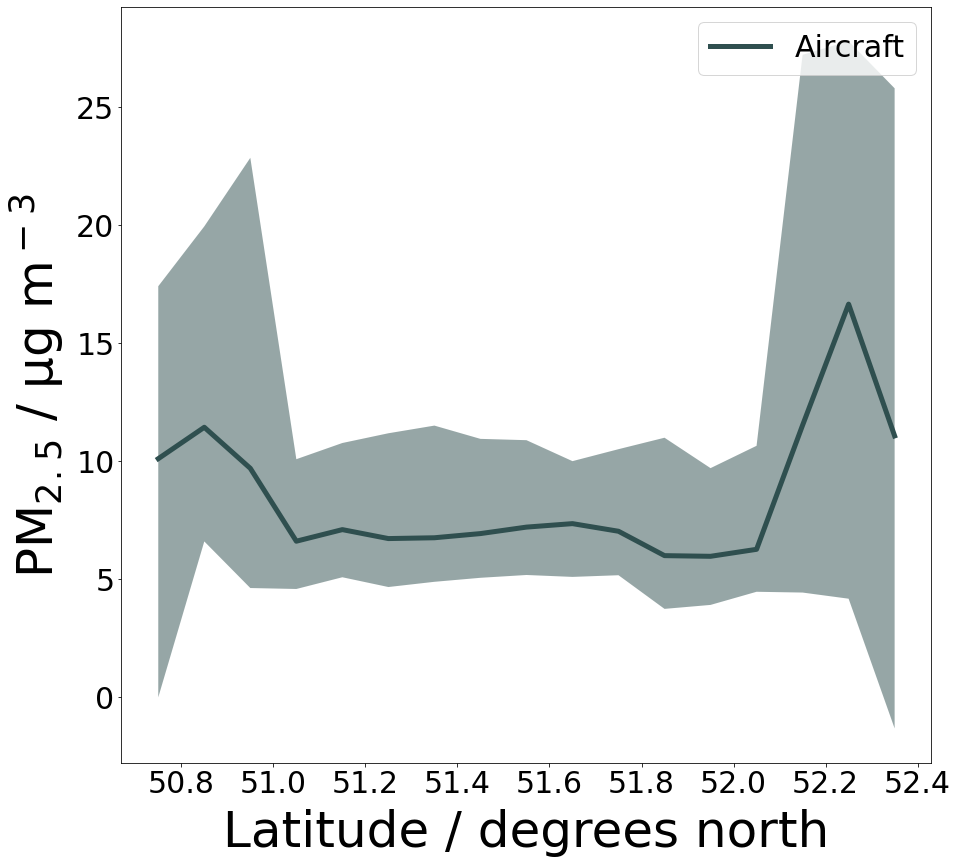

In [4]:
species_dict = pre.species_dictionary()
setup = pre.setup_notebook(flight_number, model)
optns = setup[4]
for key in species_dict.keys() :
    code,label,column_key,unit_conv = species_dict[key]['code'],species_dict[key]['label'],species_dict[key]['column_key'],species_dict[key]['unit_conv']

        # Combine the aircraft and model data.
    df = pre.combine_data(setup,code)

        # Resample the data.
    resample_df = pre.resample_data(df,optns['resample_time'],optns['avg_method'],optns['min_method'],optns['max_method'],model)
    
    plot_latitude_profile(df,resample_df,setup[5],key,label,optns['a_colour'],optns['m_colour'],optns['lat_bin'],optns['avg_method'],optns['min_method'],optns['max_method'], model)